<a href="https://colab.research.google.com/github/MikeTheSense/DigitalDepartment24/blob/main/%D0%9F%D0%B5%D1%80%D0%B2%D0%B0%D1%8F_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%A1%D1%82%D1%83%D0%B4%D0%B5%D0%BD%D1%82%D0%B0%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Импортируем необходимые библиотеки:



1.   **networkx**
позволяет создавать, управлять и анализировать графы, такие как когнитивные модели, социальные сети, транспортные сети и т. д. В networkx можно легко добавлять вершины, устанавливать рёбра между ними, задавать веса этих связей и визуализировать граф.
https://networkx.org/documentation/stable/tutorial.html

2.   **numpy**
основная библиотека для численных вычислений в Python. Предоставляет эффективные инструменты для математических операций над большими массивами данных и матрицам
 https://numpy.org/devdocs/user/absolute_beginners.html
3. **matplotlib.pyplot**
библиотека предоставляет широкие возможности для визуализации, начиная от простых линейных графиков и заканчивая сложными трёхмерными представлениями данных.
https://matplotlib.org/stable/tutorials/index



In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class CognitiveModel:
    def __init__(self):
        self.graph = nx.DiGraph()  # Создаем направленный граф для модели

    def add_parameter(self, name):
        """Добавить новый параметр в модель."""
        self.graph.add_node(name)

    def remove_parameter(self, name):
        """Удалить параметр из модели."""
        if name in self.graph:
            self.graph.remove_node(name)

    def add_connection(self, source, target, weight):
        """Добавить связь между двумя параметрами с весом."""
        self.graph.add_edge(source, target, weight=weight)

    def remove_connection(self, source, target):
        """Удалить связь между параметрами."""
        if self.graph.has_edge(source, target):
            self.graph.remove_edge(source, target)

    def show_graph(self):
        """Визуализировать когнитивную модель."""

        pos = nx.circular_layout(self.graph)
        labels = nx.get_edge_attributes(self.graph, 'weight')
        nx.draw(self.graph, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=15)
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=labels)
        plt.rcParams["figure.figsize"] = (15,8)
        plt.show()

In [ ]:
def check_stability(CognitiveModel):
        """Проверить структурную устойчивость (наличие циклов)."""
        try:
            cycle = nx.find_cycle(CognitiveModel.graph, orientation='original')
            print("Цикл найден:", cycle)
            return False  # Наличие цикла - система может быть неустойчивой
        except nx.NetworkXNoCycle:
            print("Циклы не найдены. Структурная устойчивость подтверждена.")
            return True  # Циклов нет, структура устойчива

In [ ]:
def impulse_simulation(CognitiveModel, impulse_param, steps=10):
        """Импульсное моделирование для параметра."""
        # Получаем список параметров и создаем индексную карту
        params = list(CognitiveModel.graph.nodes)
        param_index = {param: idx for idx, param in enumerate(params)}

        # Создаем матрицу весов
        adjacency_matrix = np.zeros((len(params), len(params)))
        for u, v, data in CognitiveModel.graph.edges(data=True):
            adjacency_matrix[param_index[u], param_index[v]] = data['weight']

        # Начальные значения параметров (нулевые)
        state = np.zeros(len(params))
        initial_impulse = state.copy()
        initial_impulse[param_index[impulse_param]] = 1  # Задаем импульс

        # Моделирование на несколько шагов
        history = [state.copy()]
        #initial_impulse = state.copy()
        #state = np.zeros(len(params))
        for i in range(steps):
            print(state)
            state =  state + (np.linalg.matrix_power(np.transpose(adjacency_matrix), i) @ initial_impulse)
            history.append(state.copy())


        history = np.array(history)
        return params, history

In [ ]:
  def plot_impulse_response(CognitiveModel, impulse_param):
        """Построить графики импульсных процессов."""
        params, history = impulse_simulation(CognitiveModel,impulse_param)

        plt.figure(figsize=(10, 6))
        for i, param in enumerate(params):
            plt.plot(history[:, i], label=param)

        plt.title(f'Импульсный ответ на возмущение параметра: {impulse_param}')
        plt.xlabel('Шаг моделирования')
        plt.ylabel('Значение параметра')
        plt.legend()
        plt.grid(True)
        plt.show()

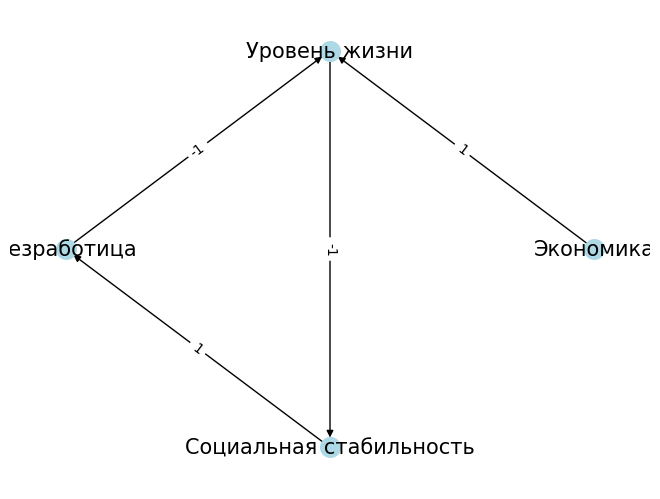

Цикл найден: [('Уровень жизни', 'Социальная стабильность', 'forward'), ('Социальная стабильность', 'Безработица', 'forward'), ('Безработица', 'Уровень жизни', 'forward')]


False

In [ ]:
    # Создаем модель
    model = CognitiveModel()

    # Добавляем параметры
    model.add_parameter("Экономика")
    model.add_parameter("Уровень жизни")
    model.add_parameter("Безработица")
    model.add_parameter("Социальная стабильность")

    # Устанавливаем связи с весами
    model.add_connection("Экономика", "Уровень жизни", 1)
    model.add_connection("Уровень жизни", "Социальная стабильность", -1)
    model.add_connection("Безработица", "Уровень жизни", -1)
    model.add_connection("Социальная стабильность", "Безработица", 1)

    # Показываем модель
    model.show_graph()

    # Анализируем устойчивость
    check_stability(model)

[0. 0. 0. 0.]
[0. 0. 1. 0.]
[ 0. -1.  1.  0.]
[ 0. -1.  1.  1.]
[ 0. -1.  2.  1.]
[ 0. -2.  2.  1.]
[ 0. -2.  2.  2.]
[ 0. -2.  3.  2.]
[ 0. -3.  3.  2.]
[ 0. -3.  3.  3.]


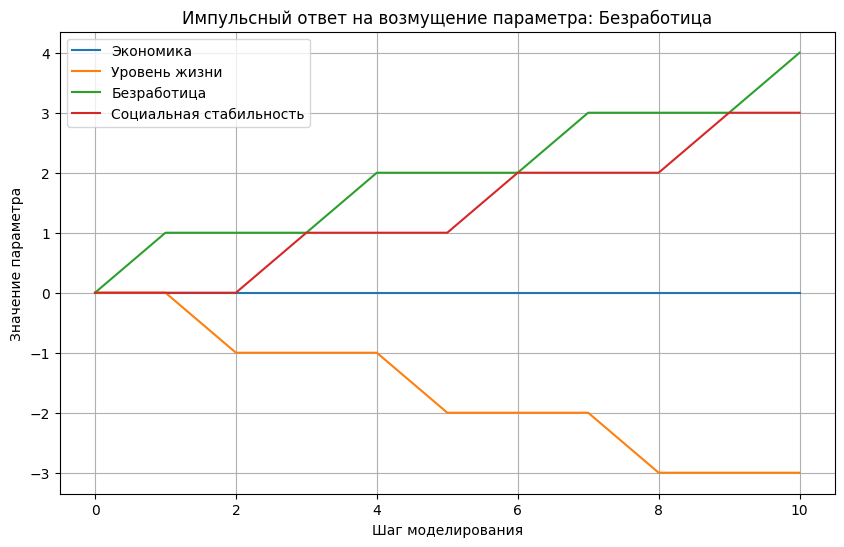

In [ ]:
plot_impulse_response(model,"Безработица")